In [71]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

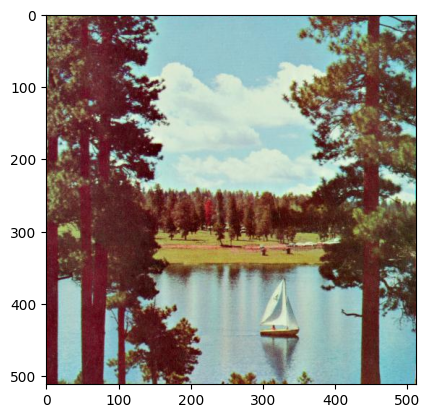

In [72]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [73]:
def convolve_im(im, kernel):
    """A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]

    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    flipped_kernel = np.fliplr(np.flipud(kernel))

    (H, W, RGB) = im.shape
    (K_x, K_y) = flipped_kernel.shape

    padding_size = int((K_x - 1) / 2)

    # Creates a padded copy of `im` which is used calculations are performed on
    # while the results are added to the `ìm`-variable
    padded = np.zeros((H + 2 * padding_size, W + 2 * padding_size, RGB))
    padded[
        padding_size : H + padding_size,
        padding_size : W + padding_size,
        :,
    ] = im

    for x in range(H):
        for y in range(W):
            for channel in range(RGB):
                # Reset the channel value at each pixel before convolution
                im[x, y, channel] = 0
                for u in range(-padding_size, padding_size + 1):
                    for v in range(-padding_size, padding_size + 1):
                        im[x, y, channel] += (
                            padded[x + padding_size + u, y + padding_size + v, channel]
                            * flipped_kernel[u + padding_size, v + padding_size]
                        )

    return im


In [74]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

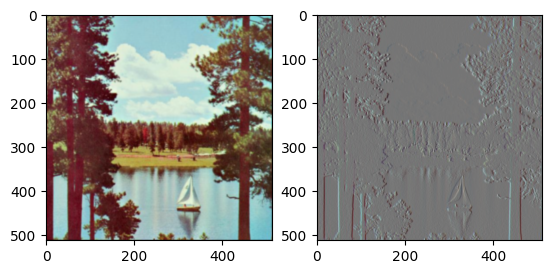

In [75]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()